<img src = 'policy_iteration.png' alt = 'policy_iteration_algorithms' style="width: 700px; height: 400px;" />

In [1]:
import numpy as np
import random
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))
from GridWorld import GridWorld

In [2]:
# discount rate, 范围[0, 1)， 0表示只关心当前reward，1表示关心所有future reward
gamma = 0.9 
rows = 10
cols = 10
# 加载网格世界
grid_world = GridWorld(rows, cols, forbiddenAreaNums=10)
grid_world.show()

⬜️⬜️⬜️⬜️⬜️🚫⬜️⬜️🚫⬜️
⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️🚫🚫⬜️⬜️⬜️⬜️
⬜️⬜️⬜️🚫⬜️⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️
🚫🚫⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️🚫✅⬜️⬜️⬜️⬜️
🚫⬜️⬜️⬜️⬜️⬜️🚫⬜️⬜️⬜️


In [3]:
# state value, initialize as 0
state_values = np.zeros(rows*cols) 

# action value, initialize as 0
qtable = np.zeros((rows*cols, 5))

# policy, initialize as random
policy = np.random.randint(0, 5, (rows*cols,5)) 
print(f'初始value: \n{state_values}')
print(f'初始policy:')
grid_world.show_policy_matirx(policy)

print('What a bad policy!')

初始value: 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
初始policy:
Now policy:
➡️⬆️⬆️⬇️⬇️⏬⬆️⬆️⏬⬆️
🔄➡️⬆️➡️⬇️➡️⬇️🔄⬆️⬅️
🔄⬅️⬇️⬇️⏬⏩️⬇️⬆️⬆️➡️
⬆️⬆️➡️⏩️➡️⬆️➡️🔄⬆️⬆️
🔄⬅️⬆️⬆️➡️⬆️⬆️➡️➡️⬅️
🔄⬆️⬆️⬅️➡️⬇️⬆️⬇️⬅️🔄
⏫️⏩️⬆️⬇️⬆️⬆️➡️⬇️➡️➡️
⬇️➡️➡️⬇️⬅️⬅️⬇️🔄➡️⬇️
🔄➡️⬇️➡️⏩️✅➡️➡️⬇️⬆️
⏬⬅️➡️➡️⬆️⬆️⏬➡️⬆️➡️
What a bad policy!


iteration times: 14
final state value: 


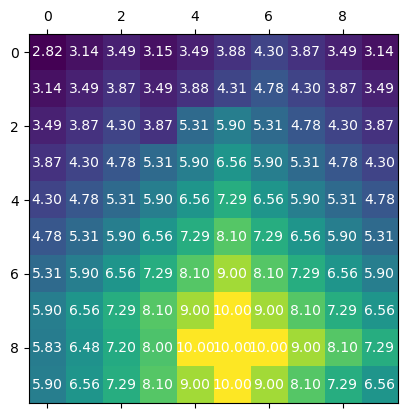

final policy:
Now policy:
➡️➡️⬇️➡️⬇️⏬⬇️⬇️⏬⬇️
➡️➡️⬇️➡️➡️⬇️⬇️⬇️⬇️⬇️
➡️➡️⬇️⬅️⏬⏬⬇️⬇️⬇️⬇️
➡️➡️⬇️⏩️➡️⬇️⬇️⬇️⬇️⬇️
➡️➡️➡️➡️➡️⬇️⬇️⬇️⬇️⬇️
➡️➡️➡️➡️➡️⬇️⬇️⬇️⬇️⬇️
⏬⏩️➡️➡️➡️⬇️⬇️⬇️⬇️⬇️
➡️➡️➡️➡️➡️⬇️⬇️⬇️⬇️⬇️
➡️➡️➡️➡️⏩️✅⬅️⬅️⬅️⬅️
⏩️➡️➡️➡️➡️⬆️⏫️⬆️⬆️⬆️


In [4]:
## set the cut-off condition
cut = 0
cut_max = 1000
## set the threshold
threshold = 1e-3
pre_value = state_values.copy() + 1



while np.sum((pre_value - state_values)**2) > threshold and cut < cut_max:
    pre_value = state_values.copy()
    
    ## policy evaluation ##
    policy_value = state_values.copy() + 1

    # truncate policy iteration to avoid infinite loop
    # if the truncated cut equals to infinite, it will be the true state value
    truncated_cut = 10
    # using bellman equation to update value, using iterative solution
    while np.sum((policy_value - state_values)**2) > threshold:
        former_value = state_values.copy()

        truncated_cut -= 1
        if truncated_cut < 0:
            break

        # iterate all states
        for i in range(rows * cols):
            # according to policy, get the action
            action = policy[i].argmax()
            # take action and get the reward and next state
            next_state, reward, ends = grid_world.step(i, action)
            # update value
            state_values[i] = reward + gamma * former_value[next_state]


    ## policy improvement ##
    # iterate all states
    for i in range(rows * cols):
        for j in range(5):
            next_state, reward, ends = grid_world.step(i, j)
            qtable[i][j] = reward + gamma * state_values[next_state]

    # update policy in one step
    policy = np.eye(len(policy[0]))[np.argmax(qtable, axis=1)]

    cut = cut + 1

print(f'iteration times: {cut}')    
print(f'final state value: ')
grid_world.show_state_value(state_values.reshape(rows,cols))
print(f'final policy:')
grid_world.show_policy_matirx(policy)